# Fourierov red

## Teorem o konvergenciji 

Neka je $f$ po djelovima glatka periodična funkcija s periodom $T=x_1-x_0$ koja na intervalu $[x_0,x_1]$ zadovoljava __Dirichletove uvjete:__

* $f$ je po djelovima neprekidna i njezini prekidi su prve vrste
* $f$ je ili monotona ili ima konačno strogih ekstrema 

Tada Fourierov red
$$
S(x)=\frac{a_0}{2}+\sum_{n=1}^\infty a_n \cos \frac{2 n \pi}{T}x + b_n \sin \frac{2 n \pi}{T}x,
$$
gdje je
$$
a_0=\frac{2}{T} \int_{x_0}^{x_1} f(x) \, dx, \\
a_n=\frac{2}{T} \int_{x_0}^{x_1} f(x) \cos \frac{2 n \pi}{T}x \,dx,\\
b_n=\frac{2}{T} \int_{x_0}^{x_1} f(x) \sin \frac{2 n \pi}{T}x \,dx,
$$
konvergira u svakoj točki $x\in [x_0,x_1]$ i vrijedi 
$$
S(x)=\begin{cases}
     f(x), \textrm{ ako je } f \textrm{ neprekinuta u točki } x,\\
     \frac{1}{2} [f(x-0)+f(x+0)], \textrm{ inače.}
     \end{cases}
     $$

## Simboličko računanje 
`SymPy` je paket za simboličko računanje preuzet iz `Python`-a, `Interact` je paket za jednostavno manipuliranje parametrima, a `Winston` je jedan od paketa za crtanje.

In [1]:
using SymPy
using Interact
using Winston

Definirajmo simboličku varijablu $x$, simboličku cjelobrojnu (integer) varijablu $n$, i granice intervala $x_0$ i $x_1$. 

In [2]:
x=Sym("x")
n=symbols("n",integer=true)
x_0=Sym("x_0")
x_1=Sym("x_1")

x₁

### Računanje koeficijenata

In [3]:
a(f,n,x_0,x_1)=2*integrate(f(x)*cos(2*PI*n*x/(x_1-x_0)),(x,x_0,x_1))/(x_1-x_0)
b(f,n,x_0,x_1)=2*integrate(f(x)*sin(2*PI*n*x/(x_1-x_0)),(x,x_0,x_1))/(x_1-x_0)

b (generic function with 1 method)

### Zadavanje funkcije $f(x)$ i granica intervala $[x_0,x_1]$

Potrebno je koristiti predefiniranu simboličku varijablu `PI` za razliku od varijabli `pi` ili $\pi$
kojima je definirana `Float64` vrijednost.

In [4]:
f(x)=x
x_0=-PI
x_1=PI

π

__Pogledajmo koeficijente__

In [5]:
a(f,n,x_0,x_1)

0

In [6]:
b(f,n,x_0,x_1)

⎧     0       for n = 0
⎪                      
⎪       n              
⎨-2⋅(-1) ⋅π            
⎪───────────  otherwise
⎪     n                
⎩                      
───────────────────────
           π           

### Računanje i crtanje sume
Za crtanje nam trebaju numeričke granice.

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(5, nactions=1),"K",5,"5",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(7=>"7",4=>"4",9=>"9",10=>"10",2=>"2",3=>"3",5=>"5",8=>"8",6=>"6",1=>"1"…)),Any[],Any[],true,"horizontal")

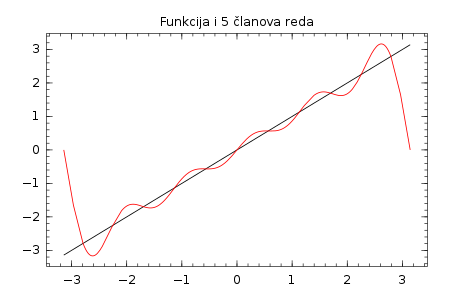

In [7]:
x0=N(x_0)
x1=N(x_1)
@manipulate for K=1:10
    S=a(f,0,x_0,x_1)/2+sum([a(f,n,x_0,x_1)*cos(2*PI*n*x/(x_1-x_0))+b(f,n,x_0,x_1)*sin(2*PI*n*x/(x_1-x_0)) for n=1:K])
    g(x)=S(x)
    plot(f,x0,x1)
    oplot(g,x0,x1,"r")
    title("Funkcija i "*string(K)*" članova reda")
end

## Numerička integracija
Fourierove koeficijente čemo izračunati _numeričkom integracijom_ (vidi [Numeričko integriranje](http://www.fesb.hr/mat2/)) koristeći Julia naredbu [quadgk](http://docs.julialang.org/en/latest/stdlib/math/?highlight=quadgk#Base.quadgk).

Ovaj dio je izrađen prema bilježnici [lecture-2.ipynb](http://nbviewer.ipython.org/url/math.mit.edu/~stevenj/18.303/lecture-2.ipynb) [Stevena Johnsona](http://math.mit.edu/~stevenj/) izrađenoj za predmet [18.303](http://math.mit.edu/~stevenj/18.303/).

Definirajmo funkcije `sinecoef` i `coscoef` koje numerički računaju koeficijente. Parametar `abstol` je toleranca numeričke integracije: želimo da je greška mala u odnosu na $\sqrt{\int_{x_0}^{x_1} |f(x)|^2 dx}$.

In [8]:
Tf=x1-x0
sinecoef(f, m, x0, x1, Tf) = 2 * quadgk(x -> f(x) * sin(2*m*π*x/Tf)/Tf, x0,x1, abstol=1e-8 * sqrt(quadgk(x->abs2(f(x)),x0,x1)[1]))[1]
coscoef(f, m, x0, x1, Tf) = 2 * quadgk(x -> f(x) * cos(2*m*π*x/Tf)/Tf, x0,x1, abstol=1e-8 * sqrt(quadgk(x->abs2(f(x)),x0,x1)[1]))[1]

# i druga funkcija koja računa na vektoru prirodnih brojeva
sinecoef(f, M::AbstractVector,x0,x1,Tf) = Float64[sinecoef(f,m,x0,x1,Tf) for m in M]
coscoef(f, M::AbstractVector,x0,x1,Tf) = Float64[coscoef(f,m,x0,x1,Tf) for m in M]

coscoef (generic function with 2 methods)

In [9]:
# First, define a function to evaluate N terms of the sine series, given the coefficients b
function fouriersum(a, b, x, T)
    f = a[1]/2
    for n = 1:length(b)
        f += a[n+1]* cos(2*n*π*x/T) + b[n] * sin(2*n*π*x/T)
    end
    return f
end
fouriersum(a, b, X::AbstractVector, T) = Float64[fouriersum(a, b,x,T) for x in X]

fouriersum (generic function with 2 methods)

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(50, nactions=1),"n",50,"50",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(68=>"68",2=>"2",89=>"89",11=>"11",39=>"39",46=>"46",85=>"85",25=>"25",55=>"55",42=>"42"…)),Any[],Any[],true,"horizontal")

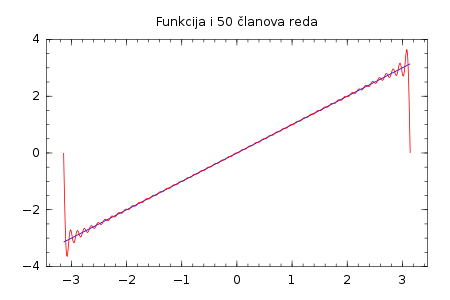

In [11]:
# Uzmimo više točaka (inače "nestane" Gibbsov efekt!!)
X=linspace(x0,x1,1000)
@manipulate for n=1:1:99
    a = coscoef(f, 0:n, x0, x1, Tf)
    b = sinecoef(f, 1:n, x0, x1, Tf)
    plot(f,x0,x1,"b",X, fouriersum(a, b, X, Tf), "r-")
    title("Funkcija i "*string(n)*" članova reda")
end

## Primjeri

In [13]:
f1(x)=x^2
x_0=-1
x_1=1

1

In [15]:
a(f1,n,x_0,x_1) 

⎧  2/3    for n = 0
⎪                  
⎪      n           
⎨4⋅(-1)            
⎪───────  otherwise
⎪  2  2            
⎩ π ⋅n             

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(5, nactions=1),"K",5,"5",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(7=>"7",4=>"4",9=>"9",10=>"10",2=>"2",3=>"3",5=>"5",8=>"8",6=>"6",1=>"1"…)),Any[],Any[],true,"horizontal")

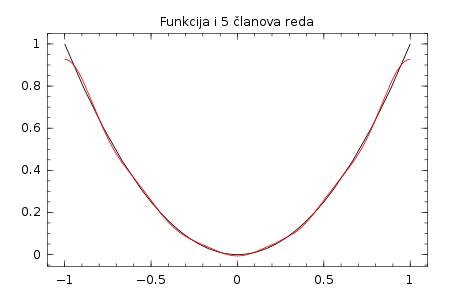

In [16]:
x0=N(x_0)
x1=N(x_1)
@manipulate for K=1:10
    S=a(f1,0,x_0,x_1)/2+sum([a(f,n,x_0,x_1)*cos(2*PI*n*x/(x_1-x_0))+b(f1,n,x_0,x_1)*sin(2*PI*n*x/(x_1-x_0)) for n=1:K])
    g(x)=S(x)
    plot(f1,x0,x1)
    oplot(g,x0,x1,"r")
    title("Funkcija i "*string(K)*" članova reda")
end

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(50, nactions=1),"n",50,"50",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(68=>"68",2=>"2",89=>"89",11=>"11",39=>"39",46=>"46",85=>"85",25=>"25",55=>"55",42=>"42"…)),Any[],Any[],true,"horizontal")

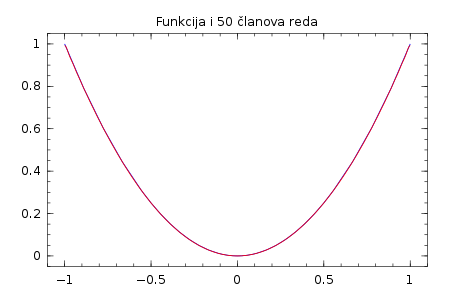

In [19]:
Tf=x1-x0
X=linspace(x0,x1,1000)
@manipulate for n=1:1:99
    a = coscoef(f1, 0:n, x0, x1, Tf)
    b = sinecoef(f1, 1:n, x0, x1, Tf)
    plot(f1,x0,x1,"b",X, fouriersum(a, b, X, Tf), "r-")
    title("Funkcija i "*string(n)*" članova reda")
end

In [20]:
# Funkcija zadana po djelovima
f2(x)=x+abs(x)
x_0=-1
x_1=1

1

Na ovu funkciju, zadanu po djelovima, ne mogu se direktno primijeniti simboličke formule, već bi ih trebalo "ručno" prilagoditi na odgovarajuči interval. Numeričko računanje radi. Funkcija se još može zadati i kao
```
f(x)=sympy.Piecewise((0,x<=0), (x,x>0))
```
ili
```
f(x)=x*sympy.Heaviside(x)
```

In [22]:
# a(f2,n,x_0,x_1)

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(49, nactions=1),"n",49,"49",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"3"=>3,"5"=>5,"7"=>7,"9"=>9,"11"=>11,"13"=>13,"15"=>15,"17"=>17,"19"=>19…),Dict(89=>"89",11=>"11",39=>"39",85=>"85",25=>"25",55=>"55",29=>"29",59=>"59",95=>"95",57=>"57"…)),Any[],Any[],true,"horizontal")

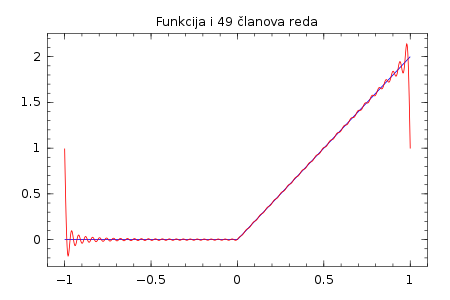

In [25]:
x0=N(x_0)
x1=N(x_1)
Tf=x1-x0
X=linspace(x0,x1,1000)
@manipulate for n=1:2:99
    a = coscoef(f2, 0:n, x0, x1, Tf)
    b = sinecoef(f2, 1:n, x0, x1, Tf)
    plot(f2,x0,x1,"b",X, fouriersum(a, b, X, Tf), "r-")
    title("Funkcija i "*string(n)*" članova reda")
end